# Unit 5 - Financial Planning


In [30]:
# Initial imports
import json
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
#from tqdm import tqdm_notebook as tqdm
#from pivottablejs import pivot_ui
# Load .env enviroment variables
load_dotenv()

True

### Collect Crypto Prices Using the `requests` Library

In [31]:
# Set current amount of crypto assets
shares_data = {
    "Shares":[1.2,5.3,50,200]
    }
mytickers= ["BTC","ETH","SPY","AGG"]
port_df=pd.DataFrame(shares_data, index=mytickers)
port_df

,Shares
BTC,1.2
ETH,5.3
SPY,50.0
AGG,200.0


In [32]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"
btc_data=requests.get(btc_url).json()
eth_data=requests.get(eth_url).json()
print(json.dumps(eth_data,indent=4))

{
    "data": {
        "1027": {
            "id": 1027,
            "name": "Ethereum",
            "symbol": "ETH",
            "website_slug": "ethereum",
            "rank": 2,
            "circulating_supply": 114360975,
            "total_supply": 114360975,
            "max_supply": 0,
            "quotes": {
                "USD": {
                    "price": 1251.86,
                    "volume_24h": 52018025986,
                    "market_cap": 143107358416,
                    "percentage_change_1h": -1.12798168096517,
                    "percentage_change_24h": 2.96757784428938,
                    "percentage_change_7d": 2.87188692115175,
                    "percent_change_1h": -1.12798168096517,
                    "percent_change_24h": 2.96757784428938,
                    "percent_change_7d": 2.87188692115175
                }
            },
            "last_updated": 1611349707
        }
    },
    "metadata": {
        "timestamp": 1611349707,
        "num_cryp

In [98]:
# Fetch current BTC price
my_btc_amount=port_df['Shares']['BTC']
btc_price=btc_data['data']['1']['quotes']['USD']['price']
my_eth_amount=port_df['Shares']['ETH']
eth_price=eth_data['data']['1027']['quotes']['USD']['price']
my_btc_value=round(my_btc_amount*btc_price,2)
my_eth_value=round(my_eth_amount*eth_price,2)
#print current crypto wallet balance
print(f"The current value of your {my_btc_amount} BTC is ${my_btc_value:.2f}")
print(f"The current value of your {my_eth_amount} ETH is ${my_eth_value:.2f}")

The current value of your 1.2 BTC is $40262.40
The current value of your 5.3 ETH is $6634.86


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [34]:
# Current amount of shares
my_agg_amount=port_df['Shares']['AGG']
my_spy_amount=port_df['Shares']['SPY']

In [35]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
# verify loaded a str
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [46]:
# Format current date as ISO format
today = pd.Timestamp("2020-07-15", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]
# Set timeframe to '1D' for Alpaca API
timeframe = "1D"
# Get current closing prices for SPY and AGG
close_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today).df

In [37]:
# Pick AGG and SPY close prices
agg_close_price=round(float(close_data['AGG']['close']),2)
spy_close_price=round(float(close_data['SPY']['close']),2)
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.64
Current SPY closing price: $321.87


In [38]:
# Compute the current value of shares
my_agg_value=agg_close_price*my_agg_amount
my_spy_value=spy_close_price*my_spy_amount
total_value={'Current Value':[my_btc_value,my_eth_value,my_spy_value, my_agg_value]}
stocks_df=pd.DataFrame(total_value, index=mytickers)
port_df=pd.concat([port_df,stocks_df],axis="columns",join='outer')
print(port_df)
# Print current value of share
print(f"The current value of your {my_btc_amount} BTC is ${my_btc_value:.2f}")
print(f"The current value of your {my_eth_amount} ETH is ${my_eth_value:.2f}")
print(f"The current value of your {my_spy_amount} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg_amount} AGG shares is ${my_agg_value:0.2f}")



     Shares  Current Value
BTC     1.2       40262.40
ETH     5.3        6634.86
SPY    50.0       16093.50
AGG   200.0       23728.00
The current value of your 1.2 BTC is $40262.40
The current value of your 5.3 ETH is $6634.86
The current value of your 50.0 SPY shares is $16093.50
The current value of your 200.0 AGG shares is $23728.00


### Savings Health Analysis

In [39]:
# Set monthly household income
monthly_income=12000
#Determine Crypto and Shares total PV then Combine into a readable df
crypto_value=(my_btc_value+my_eth_value)
crypto= { 'Total AUM': crypto_value}
shares_value=(my_spy_value+my_agg_value)
shares={ 'Total AUM': (my_spy_value+my_agg_value)}
# Create savings DataFrame
savings_df=pd.DataFrame([shares,crypto]).rename({1:'Crypto',0:'Shares'})
# Display savings DataFrame
savings_df.head()

,Total AUM
Shares,39821.50
Crypto,46897.26


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f935ce33e50>],
      dtype=object)

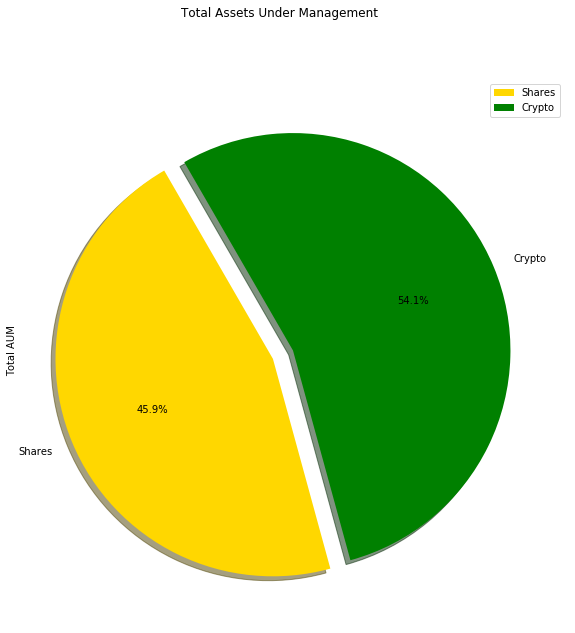

In [40]:
# Plot savings pie chart
savings_df.plot(kind='pie',
             subplots=True
            , figsize=(15,10)
            , explode=(0.1,0)
            , autopct='%1.1f%%'
            , shadow=True
            , startangle=120
            
            , title='Total Assets Under Management'
            , colors=['gold','green']
                 )

In [41]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
#Create total amount saved variable
pvn=crypto_value+shares_value
# Validate total amount of savings
if (pvn) > (emergency_fund):
    print(f'You have ${round((pvn-emergency_fund),2)} excess based on your emergency fund reqs.')
if pvn < (emergency_fund):
    print(f'You have ${round((pvn-emergency_fund),2)} remaining to meet emergency fund reqs.')
if pvn == (emergency_fund):
    print(f'!!!Congrats!!! You have arrived at your Financial Emergency Fund Goal')

You have $50718.76 excess based on your emergency fund reqs.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [92]:
# Set start and end dates of five years back from today.
start_date = pd.Timestamp("2016-01-20", tz='America/New_York').isoformat()
end_date = pd.Timestamp("2021-01-20", tz='America/New_York').isoformat()

In [93]:
# Get 5 years' worth of historical data for SPY and AGG
stocks_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date).df
# Display sample data
stocks_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2016-01-20 00:00:00-05:00  185.03  188.06  181.02  185.79  245668486  
2016-01-21 00:00:00-05:00  186.21  188.87  184.64  186.68  154918462  
2016-01-22 00:00:00-05:00  189.78  190.76  188.88  190.49  132418951  
2016-01-25 00:00:00-05:00  189.93  190.15  187.41  187.66   99219694  
2016-01-26 00:00:00-05:00  188.42  190.53  188.02  190.18  115312517

In [94]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear=MCSimulation(
          portfolio_data=stocks_data
        , weights=[.4,.6]
        , num_simulation=50
        , num_trading_days=252*30
    )

In [95]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-20 00:00:00-05:00          NaN  185.03  188.06  181.02  185.79   
2016-01-21 00:00:00-05:00    -0.001285  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   

                                                   
                              volume daily_return  
time                                               
2016-01-20 00:00:00-05:00  245668486          NaN  
2016-01-21 00:00:00-05:00  154918462     0.004790  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429

In [96]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.


KeyboardInterrupt: 

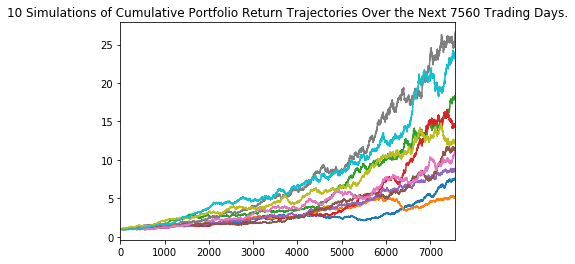

In [58]:
# Plot simulation outcomes
line_plot=MC_thirtyyear.plot_simulation()
line_plot.get_figure().savefig('MC_thirtyyear_sim_plot.png',bbox_inches='tight')

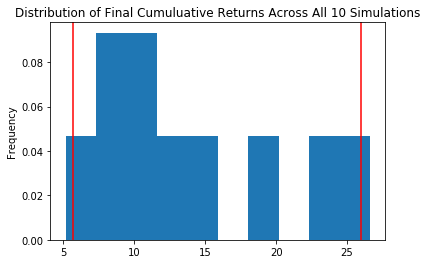

In [59]:
# Plot probability distribution and confidence intervals
dist_plot=MC_thirtyyear.plot_distribution()
line_plot.get_figure().savefig('MC_thirtyyear_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [60]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl=MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(tbl)

count           10.000000
mean            13.884388
std              6.983357
min              5.163737
25%              9.325865
50%             11.797975
75%             17.303610
max             26.608900
95% CI Lower     5.683970
95% CI Upper    25.956082
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the 95% lower and upper confidence intervals based on a `$20,000` initial investment.

In [88]:
# Set initial investment
initial_investment = 20000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $113679.41 and $519121.65


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [89]:
# Set initial investment
initial_investment = initial_investment*1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower=round(tbl[8]*initial_investment,2)
ci_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $170519.11 and $778682.47


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [79]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear=MCSimulation(
              portfolio_data=stocks_data
            , weights=[.8,.2]
            , num_simulation=50
            , num_trading_days=252*5
    )
MC_fiveyear.portfolio_data.head()

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040.0   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926.0   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878.0   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189.0   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-20 00:00:00-05:00          NaN  185.03  188.06  181.02  185.79   
2016-01-21 00:00:00-05:00    -0.001285  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   

                                                   
                              volume daily_return  
time                                               
2016-01-20 00:00:00-05:00  245668486          NaN  
2016-01-21 00:00:00-05:00  154918462     0.004790  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429

In [72]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_fiveyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.


,0,1,2,3,4,5,6,7,8,9
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004279,0.997990,1.002983,0.987919,1.010783,1.006397,0.995660,1.008135,1.000969,1.000021
2,1.006173,0.986998,1.005333,0.991877,1.003918,1.005547,1.000133,1.011634,1.005228,1.000321
3,0.998149,0.992653,1.005051,0.991902,1.004183,1.003863,0.993863,1.017495,1.016447,1.001753
4,1.002469,0.992373,1.001148,0.987597,1.002604,1.005596,0.993594,1.026022,1.019701,0.990811
5,0.997898,0.984323,0.998121,0.987788,1.011117,1.002916,0.997411,1.029527,1.027154,1.000857
6,0.998119,0.983745,1.000144,0.991546,1.013417,1.003893,1.002643,1.019657,1.031932,1.003538
7,1.009660,0.986816,0.995900,0.992682,1.008177,1.007111,1.003751,1.019382,1.040227,0.999716
8,1.007386,0.992393,0.995431,0.993657,1.009716,1.010865,1.003276,1.018980,1.041424,1.007993
9,1.012289,0.987548,0.989611,0.993246,1.015191,1.012095,1.002808,1.028687,1.038533,0.999600


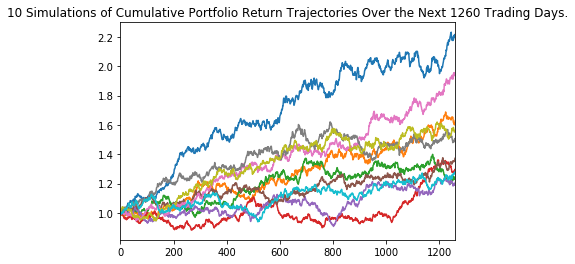

In [73]:
# Plot simulation outcomes
fiveyear_lineplot=MC_fiveyear.plot_simulation()

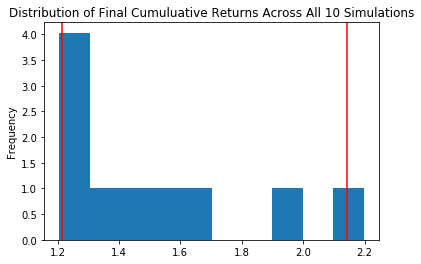

In [74]:
# Plot probability distribution and confidence intervals
fiveyear_distplot=MC_fiveyear.plot_distribution()

In [76]:
# Fetch summary statistics from the Monte Carlo simulation results
fiveyear_tbl=MC_fiveyear.summarize_cumulative_return()
# Print summary statistics
print(fiveyear_tbl)

count           10.000000
mean             1.524374
std              0.327987
min              1.206143
25%              1.282618
50%              1.438484
75%              1.612305
max              2.197603
95% CI Lower     1.214494
95% CI Upper     2.143222
Name: 1260, dtype: float64


In [90]:
# Set initial investment
initial_investment=initial_investment*2
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
fiveyear_lower = round(fiveyear_tbl[8]*initial_investment,2)
fiveyear_upper = round(fiveyear_tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${fiveyear_lower} and ${fiveyear_upper}")

There is a 95% chance that an initial investment of $60000.0 in the portfolio over the next 5 years will end within in the range of $72869.65 and $128593.3


### Ten Years Retirement Option

In [99]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear=MCSimulation(
              portfolio_data=stocks_data
            , weights=[.2,.8]
            , num_simulation=50
            , num_trading_days=252*10
    )
MC_tenyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2016-01-20 00:00:00-05:00  109.10  109.1825  108.8713  108.92  4008040   
2016-01-21 00:00:00-05:00  109.08  109.0800  108.7400  108.78  6927926   
2016-01-22 00:00:00-05:00  108.72  108.8500  108.5850  108.82  2980878   
2016-01-25 00:00:00-05:00  108.95  108.9800  108.7700  108.79  3120189   
2016-01-26 00:00:00-05:00  108.90  108.9950  108.7699  108.90  2023631   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2016-01-20 00:00:00-05:00          NaN  185.03  188.06  181.02  185.79   
2016-01-21 00:00:00-05:00    -0.001285  186.21  188.87  184.64  186.68   
2016-01-22 00:00:00-05:00     0.000368  189.78  190.76  188.88  190.49   
2016-01-25 00:00:00-05:00    -0.000276  189.93  190.15  187.41  187.66   
2016-01-26 00:00:00-05:00     0.001011  188.42  190.53  188.02  190.18   

                                                   
                              volume daily_return  
time                                               
2016-01-20 00:00:00-05:00  245668486          NaN  
2016-01-21 00:00:00-05:00  154918462     0.004790  
2016-01-22 00:00:00-05:00  132418951     0.020409  
2016-01-25 00:00:00-05:00   99219694    -0.014856  
2016-01-26 00:00:00-05:00  115312517     0.013429

In [100]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_tenyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.012346,1.003910,1.005694,1.016273,1.008580,0.997338,1.025789,1.005144,1.004618,1.008639,...,0.991448,0.994276,0.982756,0.999700,1.019266,0.992954,1.014051,0.999076,1.004532,1.008578
2,1.002152,1.021817,1.015287,1.007577,1.010032,0.996689,1.036126,1.014186,0.993348,1.013939,...,0.992040,1.006504,0.968919,0.984489,1.019511,0.980648,1.025013,1.001854,1.006289,1.010634
3,1.000807,1.017801,1.013325,0.988346,1.008746,0.972982,1.033793,1.036612,0.987089,1.020030,...,0.987740,1.007332,0.947576,0.983354,1.023045,0.974418,1.040096,1.013481,1.003299,1.011850
4,1.007246,1.022537,1.021632,0.987250,1.010887,0.989655,1.030922,1.034081,0.978051,1.026105,...,1.007386,1.007206,0.932971,0.988351,1.022176,0.964757,1.051260,1.014579,1.005347,1.013036
5,0.999244,1.012901,1.014798,0.988214,0.988295,1.000365,1.020148,1.032008,0.983046,1.021690,...,0.989012,1.027546,0.935676,0.985230,1.014464,0.958439,1.059037,1.007499,0.989958,1.016905
6,1.001126,0.994598,1.028955,0.992139,1.005958,0.998588,1.009429,1.013495,0.989300,1.017087,...,0.966225,1.033822,0.946855,0.975152,1.019735,0.970483,1.073788,1.014967,0.985913,1.010125
7,0.994094,1.002285,1.042714,0.997519,1.016878,0.984344,1.003621,1.017792,0.996528,1.016243,...,0.976461,1.025364,0.940615,0.973441,1.033728,0.976900,1.080016,1.030025,0.988469,1.015994
8,1.001685,1.024547,1.027940,0.992024,1.022315,0.992859,1.002790,1.009618,1.004835,1.026585,...,0.975441,1.023643,0.942961,0.974600,1.021888,0.986189,1.098681,1.046202,0.986058,1.016961
9,1.012296,1.018825,1.029993,0.983050,1.031880,0.978466,1.002197,1.015931,1.005952,1.029064,...,0.976708,1.023568,0.957370,0.968049,1.029120,0.975792,1.098990,1.059917,0.990131,1.006871


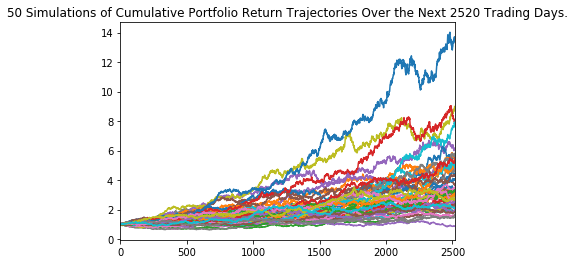

In [101]:
# Plot simulation outcomes
tenyear_lineplot=MC_tenyear.plot_simulation()

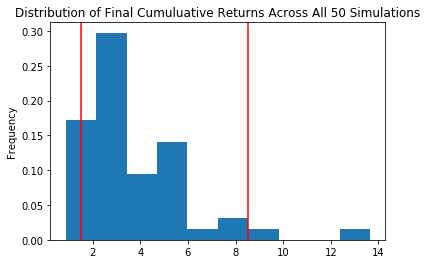

In [102]:
# Plot probability distribution and confidence intervals
tenyear_distplot=MC_tenyear.plot_distribution()

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
tenyear_tbl=MC_tenyear.summarize_cumulative_return()
# Print summary statistics
print(tenyear_tbl)

count           50.000000
mean             3.814765
std              2.235820
min              0.866853
25%              2.401119
50%              3.156572
75%              4.809810
max             13.645960
95% CI Lower     1.504868
95% CI Upper     8.531898
Name: 2520, dtype: float64


In [104]:
# Set initial investment
initial_investment = initial_investment
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
tenyear_lower=round(tbl[8]*initial_investment,2)
tenyear_upper=round(tbl[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${tenyear_lower} and ${tenyear_upper}")

There is a 95% chance that an initial investment of $60000.0 in the portfolio over the next 10 years will end within in the range of $341038.23 and $1557364.94
